In [5]:
from torch.utils.cpp_extension import load
import time
bench_l2 = load(name="bench_l2", sources=["l2.cpp", "l2_partitions.cu"], extra_cuda_cflags=["-arch=sm_89", "--keep", "--keep-dir", "/workspace/benchmarks/temp"], verbose=True)
print(bench_l2)
global_results, local_results = bench_l2.bench(0, 108, 128, 1)

Using /root/.cache/torch_extensions/py310_cu121 as PyTorch extensions root...
The input conditions for extension module bench_l2 have changed. Bumping to version 1 and re-building as bench_l2_v1...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py310_cu121/bench_l2/build.ninja...
Building extension module bench_l2_v1...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


[1/3] /usr/local/cuda/bin/nvcc --generate-dependencies-with-compile --dependency-output l2_partitions.cuda.o.d -DTORCH_EXTENSION_NAME=bench_l2_v1 -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1011\" -isystem /usr/local/lib/python3.10/dist-packages/torch/include -isystem /usr/local/lib/python3.10/dist-packages/torch/include/torch/csrc/api/include -isystem /usr/local/lib/python3.10/dist-packages/torch/include/TH -isystem /usr/local/lib/python3.10/dist-packages/torch/include/THC -isystem /usr/local/cuda/include -isystem /usr/include/python3.10 -D_GLIBCXX_USE_CXX11_ABI=0 -D__CUDA_NO_HALF_OPERATORS__ -D__CUDA_NO_HALF_CONVERSIONS__ -D__CUDA_NO_BFLOAT16_CONVERSIONS__ -D__CUDA_NO_HALF2_OPERATORS__ --expt-relaxed-constexpr -gencode=arch=compute_80,code=compute_80 -gencode=arch=compute_80,code=sm_80 --compiler-options '-fPIC' -arch=sm_89 --keep --keep-dir /workspace/benchmarks/temp -std=c++17 -c /workspace/benchma

Loading extension module bench_l2_v1...


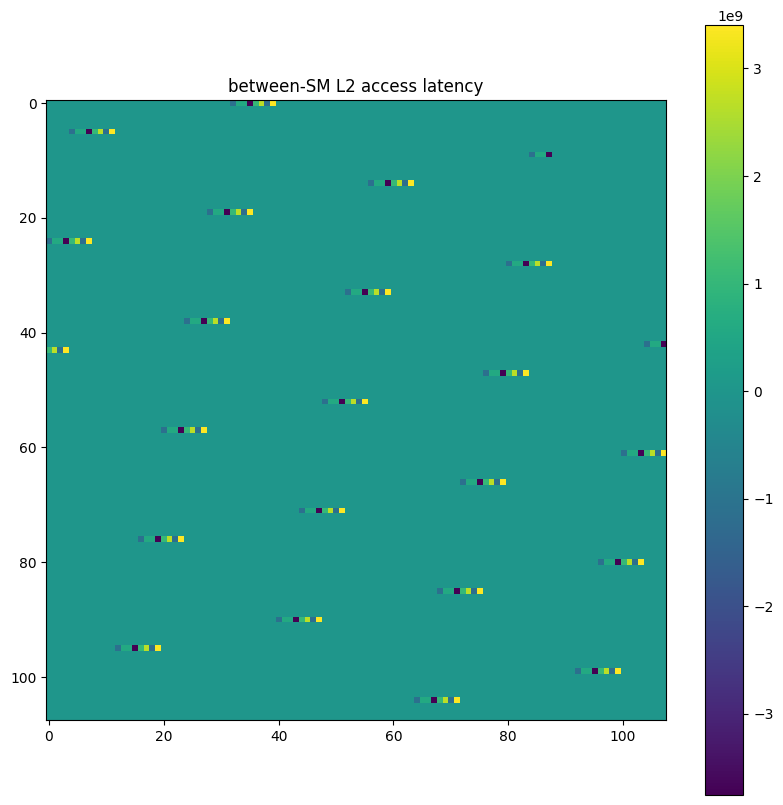

In [6]:
import matplotlib.pyplot as plt
import torch

summed_results = local_results.to(torch.int64).sum(axis=3).sum(axis=0) # sum b/w iterations and warps

# for i in range(local_results.shape[0]):
    # Create the heatmap
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plt.imshow(local_results.sum(axis=0).to(torch.int64).sum(axis=2).numpy(), cmap='viridis')  # Choose a colormap that fits your preference
plt.colorbar()  # Adds a colorbar to the side
plt.title('between-SM L2 access latency')
plt.show()

In [ ]:
summed_results[0]


In [ ]:
summed_results[:, 1]

In [ ]:
(local_results.sum(axis=3) == 192).sum()

In [2]:
!pip3 install matplotlib ninja[global]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 156.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 119.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 173.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 110.0 MB/s eta 0:00:00
